In [1]:
import numpy as np
import pyvista as pv
pv.set_jupyter_backend("static") # do not create user interactive 3D plots

from carpy.environment.navigation._wgs84 import WGS84
from carpy.utility import constants as co

In [2]:
n_pt = 20
lats = np.linspace(-np.pi, np.pi, n_pt) / 2  # [- 90,  90]
lons = np.linspace(-np.pi, np.pi, n_pt)      # [-180, 180]

LATS, LONS = np.meshgrid(lats, lons)

In [3]:
X, Y, Z = WGS84()._planetodetic_to_XYZ(lat=LATS, lon=LONS, alt=0)

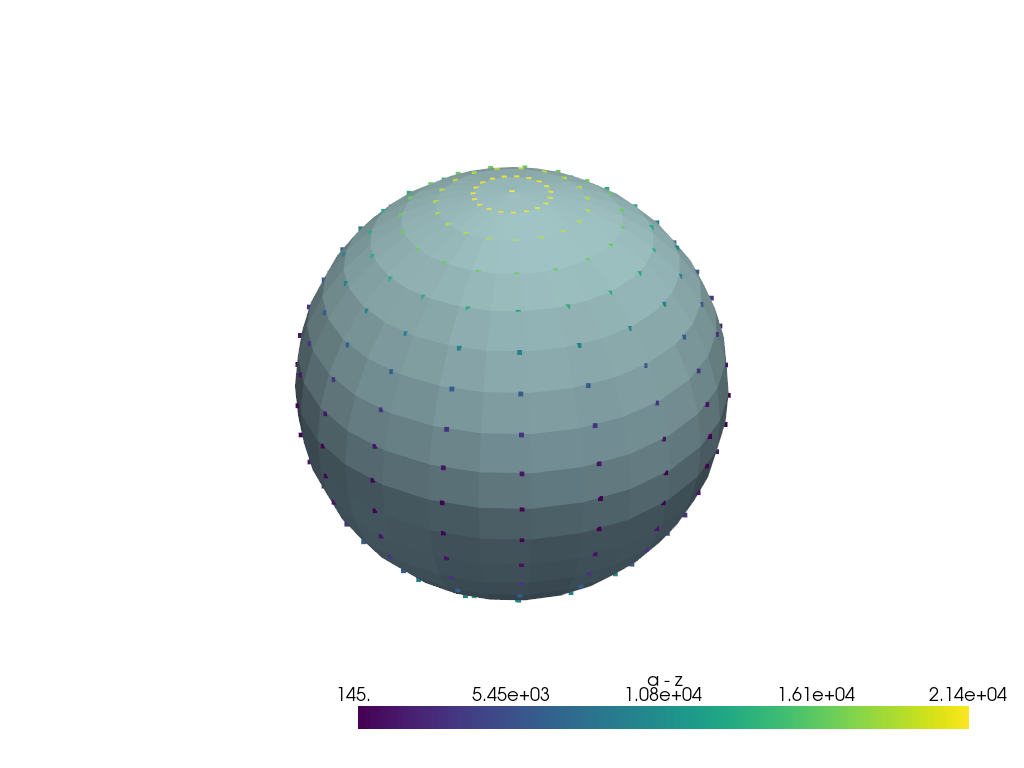

In [4]:
points = np.vstack((X.flat, Y.flat, Z.flat)).T

mesh = pv.PolyData(points)
mesh.point_data['a - z'] = co.STANDARD.WGS84.a - np.linalg.norm(points, axis=1)

pl = pv.Plotter()
pl.add_mesh(mesh)
pl.add_mesh(pv.SolidSphere(outer_radius=co.STANDARD.WGS84.a, phi_resolution=n_pt))
pl.show()